In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.rc('figure',figsize=(15,10))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend',fontsize=20)
plt.rc('lines',linewidth=5, markersize=10)

# Funciones para hacer el problema

In [2]:
def teo(x):
    """Solución teórica de la ecuación de la guía"""
    return (4/1.3)*( np.exp(0.8*x)-np.exp(-0.5*x) ) + 2*np.exp(-0.5*x)

def F(_x, _y):
    """Ecuación Diferencial"""
    return 4*np.exp(0.8*_x) - 0.5 * _y

def paso_euler(_dx, _xo, _yo, _F):
    """
    Solución de un paso por el método de Euler
    Parámetros:
    ===========
    _dx = tamaño de paso
    _xo = posición inicial
    _yo = condición inicial
    _F = función característica de la ecuación diferencial
    
    Retorna
    ===========
    valor de la solución en x+dx
    """
    return _yo + _dx*_F(_xo, _yo)

def paso_heun(_dx, _xo, _yo, _F):
    """
    Solución de un paso por el método de Runge - Kutta de orden 4
    Parámetos:
    ===========
    _dx = tamaño de paso
    _xo = posición inicial
    _yo = condición inicial
    _F = función característica de la ecuación diferencial
    
    Retorna
    ==========
    valor de la solución en x+dx
    """
    y_1_2 = _yo + _dx*_F(_xo, _yo)/2
    return _yo + _dx*_F(_xo+_dx/2, y_1_2)
    
    
def paso_RK(_dx, _xo, _yo, _F):
    """
    Solución de un paso por el método de Runge - Kutta de orden 4
    Parámetos:
    ===========
    _dx = tamaño de paso
    _xo = posición inicial
    _yo = condición inicial
    _F = función característica de la ecuación diferencial
    
    Retorna
    ==========
    valor de la solución en x+dx
    """
    K1 = F(_xo, _yo)
    K2 = F(_xo + 0.5*_dx, _yo+0.5*K1*_dx)
    K3 = F(_xo + 0.5*_dx, _yo+0.5*K2*_dx)
    K4 = F(_xo +     _dx, _yo+    K3*_dx)
    return _yo + (1/6)*(K1+2*K2+2*K3+K4)*_dx

def dfsolve(N, xo = 0, xf = 4, yo = 2, func=F, method=paso_euler):
    """
    Motor de solución para una ecuación temporal para todo el intervalo del problema
    
    Parámetros:
    ==========
    dx: tamaño de paso, = 0.1
    xo: posición inicial, =0
    xf: posición final (límite del intervalo), = 4
    yo: condición inicial, =2
    func: ecuación característica de la ecuacion diferencial (callable) = F
    method: método de solución(callable) = paso_euler
    
    Retorna:
    ==========
    X: vector de las posiciones donde se resolvió la ecuación
    SOL: valores de Y con la solución encontrada
    """
    X = np.linspace(xo, xf,N+1)
    dx = (xf - xo)/N
    SOL = [yo]
    for i, x in enumerate(X[:-1]):
        SOL.append(
            method(dx, x, SOL[-1], func )
        )
    return X, SOL
        
def error(valteo, valaprox):
    return abs((valteo - valaprox)/valteo)
#    plt.plot(X, teo(X), 'ok')
    
    

# Paso a paso

In [3]:
xf = 4
xo = 0
yo = 2
N = 5

In [4]:
dx = (xf - xo)/N

In [5]:
paso_euler(dx, 0, 2, F)

4.4

In [6]:
paso_RK(dx,0, 2,F)

5.115445304707675

In [7]:
xeu, yeu = dfsolve(N=4)

In [8]:
Xrk, yrk = dfsolve(N = 4, method=paso_RK)

In [9]:
Xheu, yheu = dfsolve(N = 4, method=paso_heun)

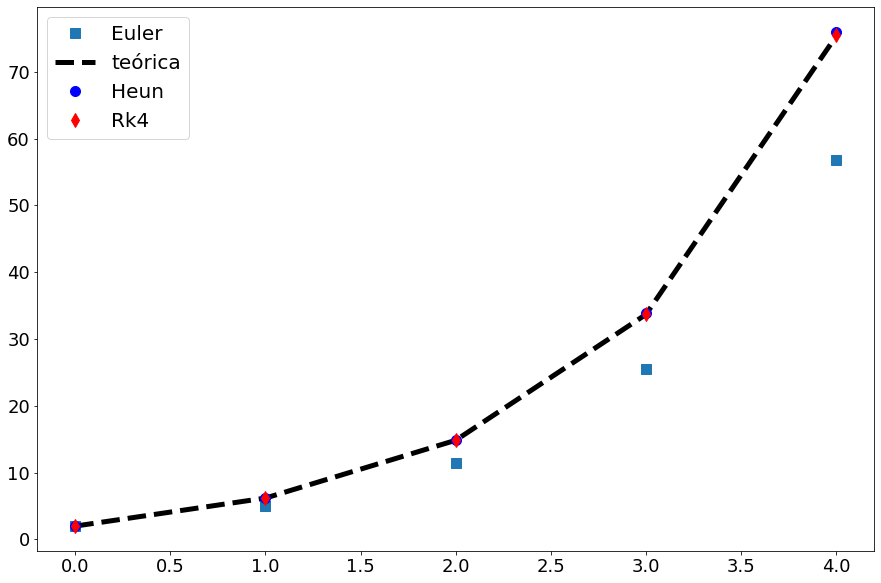

In [10]:
plt.plot(xeu, yeu, 's', label='Euler')
plt.plot(xeu,teo(xeu),'--k', label='teórica')
plt.plot(Xheu, yheu, 'ob', label='Heun')
plt.plot(Xrk, yrk, 'dr', label='Rk4')
plt.legend()

# encuentro el mejor intervalo 

In [11]:
N = np.logspace(np.log(2),5,20, dtype=int)

In [12]:
def analyze_method(thisn, thismethod):
    X, Y = dfsolve(then, func=F, method=thismethod)
    err = error(teo(X[-1]), Y[-1])
    return {then: {'X':X, 'Y':Y, 'err':err } }

In [13]:
solutions = {'RK':{}, 'HE':{}, 'EU':{}}
for then in N: 
    solutions['RK'].update( analyze_method(then, paso_RK) )
    solutions['HE'].update( analyze_method(then, paso_heun) )
    solutions['EU'].update( analyze_method(then, paso_euler) )

In [14]:
errors_rk = [thesol['err'] for then, thesol in solutions['RK'].items()]

In [15]:
errors_heu = [thesol['err'] for then, thesol in solutions['HE'].items()]

In [16]:
errors_eu= [thesol['err'] for then, thesol in solutions['EU'].items()]

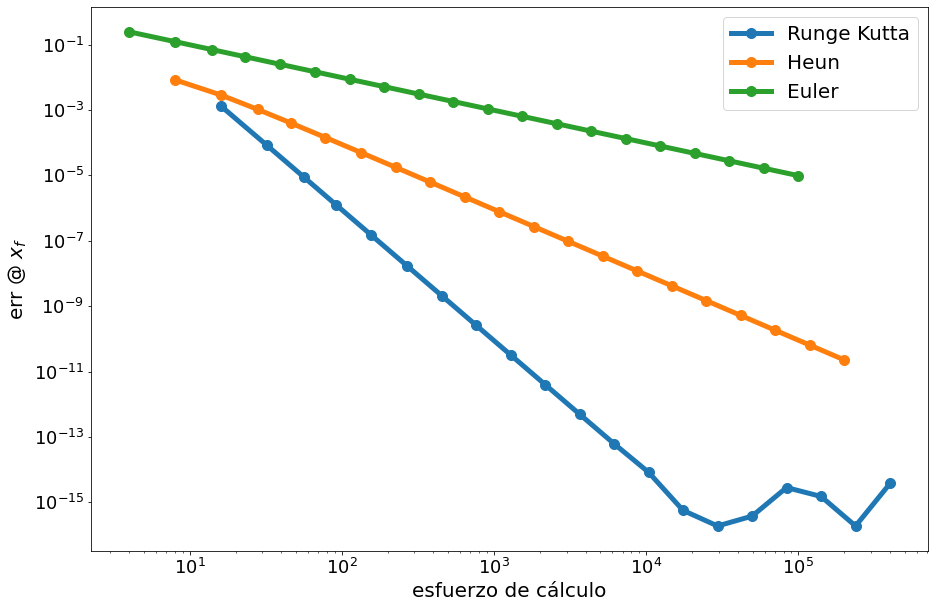

In [17]:
plt.loglog(4*N, errors_rk, '-o', label='Runge Kutta')
plt.loglog(2*N, errors_heu, '-o', label='Heun')
plt.loglog(N, errors_eu,  '-o', label='Euler')
plt.xlabel('esfuerzo de cálculo')
plt.ylabel('err @ $x_f$')
plt.legend()